In [1]:
import numpy as np
import sympy as sp

import matplotlib.pyplot as plt
%matplotlib inline

import itertools

from sympy.core.sympify import kernS, sympify
from sympy import Symbol, symbols, var, apart, together, diff, lambdify

KeyboardInterrupt: 

# Part One.. Constrained Optimization
### Penalty Method + Gradient Descent as inner optimizer

In [2]:
def gradient_descent(obj_func, derivatives, optima, alpha = 0.01, epsilon = 0.0001, num_iter = 100, plot = False):
    if plot:
        function_values = [] 
    
    for i in range(num_iter):
        gradients = np.array([derivative.evalf(subs = optima) for derivative in derivatives])
        steps = gradients * alpha
        for key, step in zip(optima.keys(), steps):
            optima[key] = optima[key] - step
        if plot:
            function_values.extend([obj_func.evalf(subs = optima)])           
        if np.linalg.norm(gradients.astype(np.float64)) < epsilon:
            break
            
    if plot:
        function_values = np.array(function_values)
        plt.plot(range(function_values.size), function_values)
        
    return gradients

In [3]:
def optimization_penalty(function, constraints, mode = 'minimize', penalty_factor = 5, start_penalty = 0.005, num_iter = 5, plot = False):
# params:
# function: Objective function to maximize / minimize (Sympy equation)
# constraints: Vector of constraints (Sympy equations)
# mode: if function is required to maximize or minimize
    working_solution = {k: np.random.rand()*4 for k in list(function.free_symbols)}  
    print('Starting with:' + str(working_solution))
    
    penalties = np.zeros(len(constraints)) + start_penalty
    if mode == 'maximize':
        f2 = -1*function
    else:
        f2 = function
    
    for i in range(num_iter):
        ## rescale penalties
        penalties *= penalty_factor        
        ## Reformulate Objective function
        constraints_values = np.array([constraint.evalf(subs = working_solution) for constraint in constraints])
        copy = np.array([eqn if value > 0 else sympify('0') for eqn, value in zip(constraints, constraints_values)])
        obj_func = f2 + penalties.dot(np.square(copy))
        ## compute the gradient function of the new Objective function
        partial_derivatives = [obj_func.diff(sym) for sym in working_solution.keys()]
        ## Call optimizer
        gradients = gradient_descent(function, partial_derivatives, working_solution, plot = plot) 

    if plot:
        plt.show()
        
    y = function.evalf(subs = working_solution) 
    constraints_values = np.array([constraint.evalf(subs = working_solution) for constraint in constraints])
    
    return y, constraints_values, working_solution

x**2 + y**2
[x + 1 y - 2]
Starting with:{x: 2.0618440801500038, y: 0.5566858517852737}


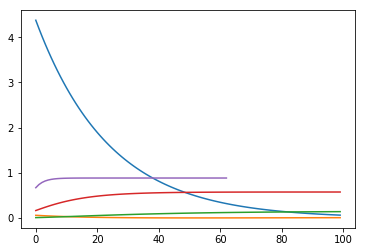

0.883317318168786
[0.0601503759414393 -1.99995177377928]
{x: -0.939849624058561, y: 4.82262207161910e-5}


In [4]:
test1 = sympify('x**2 + y**2') ## minimize
constraints1 = np.array([sympify('x+1'), sympify('y-2')]) ## ie: should end up with x ~ -1, y ~ 0

print(test1)
print(constraints1)
f_value, constraints_values, optima = optimization_penalty(test1, constraints1, plot = True)
print(f_value)
print(constraints_values)
print(optima)

-x**2 - y**2
[x + 2 -x - 4 y + 1]
Starting with:{x: 3.8903741136111334, y: 2.782630597801321}


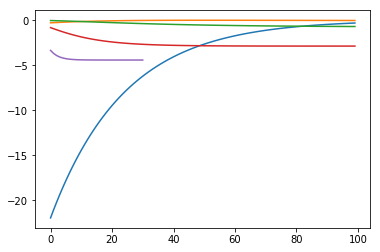

-4.41658038569153
[0.120302069865050 -2.12030206986505 0.0601510349327872]
{x: -1.87969793013495, y: -0.939848965067213}


In [5]:
test2 = sympify('-(x**2 + y**2)') ## maximize 
constraints2 = np.array([sympify('x + 2'), sympify('-x - 4'), sympify('y + 1')]) ## ie: should end up with x ~ -2, y ~ -1

print(test2)
print(constraints2)
f_value, constraints_values, optima = optimization_penalty(test2, constraints2, mode = 'maximize', num_iter = 5, plot = True)
print(f_value)
print(constraints_values)
print(optima)

x + 3*y - 2*z
[x - 4 y - 2 -z + 1]
Starting with:{x: 1.5075685049637961, y: 2.1047435031440087, z: 1.2430915295751226}


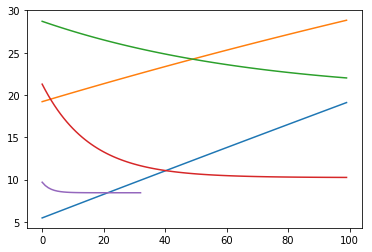

8.44800772335162
[0.0320005483551133 0.0960016559473478 0.0640011035772332]
{x: 4.03200054835511, y: 2.09600165594735, z: 0.935998896422767}


In [6]:
test3 = sympify('x + 3*y - 2*z') ## maximize
constraints3 = np.array([sympify('x-4'), sympify('y - 2'), sympify('-z + 1')])## x ~ 4, y ~ 2, z ~ 1

print(test3)
print(constraints3)
f_value, constraints_values, optima = optimization_penalty(test3, constraints3, mode = 'maximize', plot = True)
print(f_value)
print(constraints_values)
print(optima)

In [5]:
## Must handle: Equality Constraints, Inequality Constraints, Bound COnstraints
#--- max(constraint, 0) for x <= a inequalities
#--- min(constraint, 0) for x >= a inequalities
# Model inequalities as f(x...) <= 0
# For Equality: function = abs(function)
# For >= inequ: function = -1*function
# For bound inequalities: ba3dein.
EQUALITY = 1
INEQUALITYGREATER = 2
INEQUALITYSMALLER = 3
func_str = input('Input Function to Maximize:\n')
function = sympify(func_str)
num_constraints = int(input('Input number of constrains:\n'))
constraints_types = np.array([int(type) for type in input('Input Constraints types (1:Equality, 2:Inequality(>=), 3:Inequality(<=)').split()])
print(constraints_types.size)
constraints = []
#-- Constraints always in form of [x+a (>=|<=|=) 0] so just input 'x+a'
for i in range(num_constraints):
    constraint = sympify(input('Input LHS of Constraint #%d:\n' % (i+1)))
    if constraints_types[i] == EQUALITY:
        constraints.append(abs(constraint))
    elif constraints_types[i] == INEQUALITYGREATER:
        constraints.append(-1*constraint)
    else:    
        constraints.append(constraint)
constraints = np.array(constraints)        

Input Function to Maximize:
1 / (1+x**2+y**2)
Input number of constrains:
2
Input Constraints types (1:Equality, 2:Inequality(>=), 3:Inequality(<=)1 2
2
Input LHS of Constraint #1:
x - 2
Input LHS of Constraint #2:
y - 1


In [ ]:
print(function)        
print(constraints)
f_value, constraints_values, optima = optimization_penalty(function, constraints, mode = 'maximize', plot = True)
print(f_value)
print(constraints_values)
print(optima)

# Part Two.. Unconstrained Optimization
### Simulated Annealing

In [4]:
def simulated_annealing(function, upper_bound = 3, lower_bound = -3, mode = 'minimize', cooling_factor = 0.8, num_iter = 5, num_samples = 20, plot = False, verbose = 0):
# params:
# function: Objective function to maximize, aka: System Energy / minimize (Sympy equation)
# mode: if function is required to maximize or minimize

    working_solution = {k: np.random.rand()*upper_bound+lower_bound for k in list(function.free_symbols)}
    
    kb = 1.0
    if mode == 'minimize':
        deltaE = sympify('newE - oldE')
    else:
        deltaE = sympify('oldE - newE')    
    
    samples = np.array([function.evalf(subs = {k: np.random.rand() for k in working_solution.keys()}) for i in range(num_samples)]) 
    t_initial = - kb*np.std(samples, dtype = np.float64) / np.log(0.7)

    function_values = []
    
    t = t_initial
    for i in range(num_iter):
        for j in range(num_samples):
            ## perturb current solution
            point = {k: v + np.random.rand() - 0.5 for k, v in working_solution.items()}
            dE = deltaE.evalf(subs = {'newE': function.evalf(subs = point), 'oldE': function.evalf(subs = working_solution)})
            if dE > 0: ## Worse solution
                ## Accept with probability
                delta = function.evalf(subs = point) + function.evalf(subs = working_solution)
                p = np.exp(np.array(-(kb*delta)/t).astype(np.float64))
                if np.random.rand() < p:
                    if verbose >= 1:
                        print('Accepted worse solution, p= %4f' %(p))
                    working_solution = point
            else: ## Better Solution
                ## Accept right away
                if verbose >= 1:
                    print('Accepted better solution')
                working_solution = point
            function_values.extend([function.evalf(subs = working_solution)])        
        t = t_initial * (cooling_factor)**i 
        if verbose >= 1:
            print(t, working_solution, function_values[-1])
    if plot:
        plt.plot(range(num_iter*num_samples), function_values)
            
    return working_solution, np.array(function_values)[-1]

1/(x**2 + y**2 + 1)
{y: -0.027368174298009085, x: -0.016222855038518502}
0.998988825518770


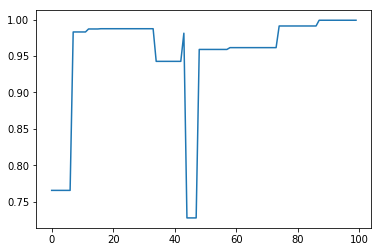

In [5]:
energy = sympify('1 / (1 + x**2 + y**2)')
function_optima, function_value = simulated_annealing(energy, upper_bound = 1, lower_bound = -1, mode = 'maximize', plot = True)
print(energy)
print(function_optima)
print(function_value)

# Part Three.. Combinatoric Optimization
### Genetic Algorithm for Traveling Salesman Problem

In [2]:
class City:
    
    def __init__(self, iD, scale):
        self.coords = np.array([np.random.rand()*scale, np.random.rand()*scale])
        self.iD = iD
        
    def get_id(self):
        return self.iD
    
    def get_coords(self):
        return self.coords

In [3]:
city = City(1, 20)
print(city.get_id())
print(city.get_coords())

1
[16.18332157 10.36431753]


In [4]:
class Neighbourhood:
    
    def __init__(self, num_cities, scale):
        self.num_cities = num_cities
        self.scale = scale
        self.cities = np.array([City(iD, self.scale) for iD in range(self.num_cities)])
        self.distances = []
        self.compute_distances()
        
    def compute_distances(self):
        for i in range(self.num_cities):
            for j in range(self.num_cities):
                if i != j:
                    self.distances.append(np.linalg.norm(self.cities[i].get_coords()-self.cities[j].get_coords())) 
                else:
                    self.distances.append(self.scale**2) ## Really Large Value
        self.distances = np.array(self.distances).reshape((self.num_cities, self.num_cities))        
        
    def show(self):
        plt.scatter([city.get_coords()[0] for city in self.cities], [city.get_coords()[1] for city in self.cities])
        plt.show()
        

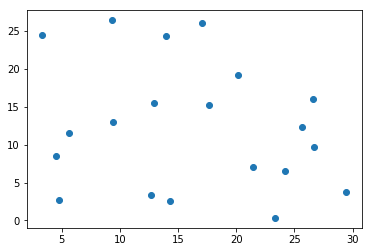

In [5]:
neighbourhood = Neighbourhood(20, 30)
neighbourhood.show()

In [6]:
class Individual:
    
    def __init__(self, size, parent1 = None, parent2 = None, set_gene = False):
        if set_gene:
            self.gene = np.arange(size)
            np.random.shuffle(self.gene)
        else:    
            self.gene = np.zeros((size), dtype = np.int32) + int(size) ## An out of range index   
        self.parent1 = parent1
        self.parent2 = parent2
        self.fitness = 0
        self.distance = 0

    def set_gene_subset(self, start_idx, end_idx, values):
        ## Handle if end index is out of range (take start:end and 0:remainder)
        if end_idx >= self.gene.size:
            remainder = end_idx - self.gene.size
            end_idx = self.gene.size
            self.gene[0:remainder] = values[0:remainder]
        self.gene[start_idx:end_idx] = values[start_idx:end_idx]
        
    def set_chromosome(self, idx, value):
        self.gene[idx] = value 
    
    def swap_chromosomes(self, idx1, idx2):
        self.gene[idx1], self.gene[idx2] = self.gene[idx2], self.gene[idx1] 
        
    def move_and_shift(self, idx1, idx2):
        if idx2 < idx1:
            idx1, idx2 = idx2, idx1           
        moved = self.gene[idx2]
        self.gene[idx1+1:idx2+1] = self.gene[idx1:idx2]
        self.gene[idx1] = moved

In [7]:
np.random.seed(1)
individual = Individual(20, set_gene = True)
print(individual.gene)

[ 3 16  6 10  2 14  4 17  7  1 13  0 19 18  9 15  8 12 11  5]


In [8]:
individual.set_gene_subset(16, 22, np.array([16, 3, 10, 6, 14, 2, 17, 4, 1, 7, 13, 0, 18, 19, 15, 9, 12, 8, 5, 11]))
print(individual.gene)
individual.set_gene_subset(1, 5, np.array([16, 10, 3, 14, 6, 2, 17, 4, 1, 7, 13, 0, 18, 19, 15, 9, 12, 8, 5, 11]))
print(individual.gene)
individual.set_chromosome(5, 4)
print(individual.gene)
individual.set_chromosome(6, 14)
print(individual.gene)
individual.swap_chromosomes(5, 6)
print(individual.gene)
individual.move_and_shift(14, 19)
print(individual.gene)
individual.move_and_shift(2, 2)
print(individual.gene)
individual.move_and_shift(19, 14)
print(individual.gene)

[16  3  6 10  2 14  4 17  7  1 13  0 19 18  9 15 12  8  5 11]
[16 10  3 14  6 14  4 17  7  1 13  0 19 18  9 15 12  8  5 11]
[16 10  3 14  6  4  4 17  7  1 13  0 19 18  9 15 12  8  5 11]
[16 10  3 14  6  4 14 17  7  1 13  0 19 18  9 15 12  8  5 11]
[16 10  3 14  6 14  4 17  7  1 13  0 19 18  9 15 12  8  5 11]
[16 10  3 14  6 14  4 17  7  1 13  0 19 18 11  9 15 12  8  5]
[16 10  3 14  6 14  4 17  7  1 13  0 19 18 11  9 15 12  8  5]
[16 10  3 14  6 14  4 17  7  1 13  0 19 18  5 11  9 15 12  8]


In [9]:
def brute_force(neighbourhood):
    primary_permutation = np.arange(neighbourhood.num_cities)
    permutations = np.array(list(itertools.permutations(primary_permutation)))
    fitnesses = []
    for permutation in permutations:
        tour = [[permutation[i], permutation[(i+1) % permutation.size]] for i in range(permutation.size)]
        tour_dist = np.sum([neighbourhood.distances[u][v] for u, v in tour])               
        fitnesses.append((76.5*neighbourhood.scale*np.sqrt(neighbourhood.num_cities)) / tour_dist)
    
    fitnesses = np.array(fitnesses)
    best_permutation = permutations[np.argmax(fitnesses)]
    return best_permutation, np.max(fitnesses)

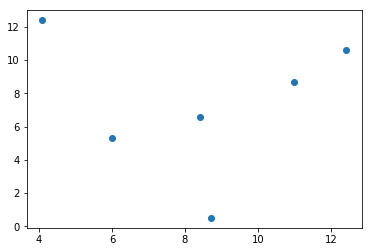

[0 2 1 5 3 4]
113.06975463744942


In [10]:
np.random.seed(2)
test_nhbr = Neighbourhood(6, 20)
test_nhbr.show()
best_permutation, best_fitness = brute_force(test_nhbr)
print(best_permutation)
print(best_fitness)

In [11]:
class Genetic_Algorithm_TSP():
    
    def __init__(self, neighbourhood, max_generations = 10, confidence = 0.999, p_mutate = 0.35, p_vax = 0, vax_criteria = None, immune_selection = False, verbose = 0):
        self.neighbourhood = neighbourhood
        if self.neighbourhood.num_cities <= 5:
            self.population_size = np.math.factorial(self.neighbourhood.num_cities)
            self.max_generations = 0
        else:
            numerator = np.log(1-np.power(confidence, 1/self.neighbourhood.num_cities))
            denominator = np.log((neighbourhood.num_cities-3) / (neighbourhood.num_cities-1))
            self.population_size = int(np.ceil(numerator / denominator))
            self.max_generations = max_generations    
        self.popoulation = None
        self.p_mutate = p_mutate
        self.p_vax = p_vax
        self.vax_criteria = vax_criteria
        self.immune_selection = immune_selection
        self.optimal_individual = None
        self.T0 = 40
        self.verbose = verbose
        self.statistics = {
            'mean_fitness': [],
            'fittest_individual': [],
            'best_fitness': [],
            'best_distance': []
        }

    def solve(self):
        self.generate_initial_population()
        for k in range(self.max_generations):
            Tk = np.log(self.T0/(k+1) + 1)
            self.population.sort(key=lambda g: g.fitness, reverse=True)
            self.optimal_individual = self.population[0]
            fitnesses = [individual.fitness for individual in self.population]
            probabilities = fitnesses / np.sum(fitnesses)
            offspring = []
            for i in range(len(self.population)):
                p1_idx = np.random.choice(range(len(self.population)), p = probabilities)
                p2 = (probabilities[p1_idx]/np.sum(probabilities.size - 1)) + np.delete(probabilities, p1_idx)
                p2_idx = np.random.choice(np.setdiff1d(range(len(self.population)), p1_idx), p = p2)
                parent1 = self.population[p1_idx]
                parent2 = self.population[p2_idx]
                child = self.create_child(parent1, parent2)
                offspring.append(child)
            offspring = np.array(offspring)
            competitors = np.array(offspring)
            if self.immune_selection:
                for i in range(offspring.size):
                    if np.random.rand() < p_vax:
                        j = np.random.rand()*self.optimal_individual.size
                        hj = optimal_individual.gene[j]
                        self.vaccinate2(competitor[i], j, hj)
                        if self.immune_test(competitor[i]):
                            ## Replace the offspring with its parent ##---> Review this part
                            competitors[i] = competitors[i].parent1
            self.statistics['mean_fitness'].append(np.mean([individual.fitness for individual in self.population]))
            self.statistics['fittest_individual'].append(self.optimal_individual)
            self.annealing_selection(competitors, offspring, Tk)

        return self.optimal_individual, self.statistics
           
    def generate_initial_population(self):  
        self.population = [Individual(self.neighbourhood.num_cities, set_gene = True) for i in range(self.population_size)]
        ## Calculate their fitnesses
        for individual in self.population:
            self.calculate_fitness(individual)
        self.set_optimal_individual()  
            
    def crossover(self, parent1, parent2):
    ## Take contiguous subset from parent1, fill rest from 2
        p_inherit = parent1.fitness / (parent1.fitness + parent2.fitness)
        if p_inherit < 0.5: ## parent 2 is fitter
            parent1, parent2, = parent2, parent1
            p_inherit = 1 - p_inherit
            
        child = Individual(self.neighbourhood.num_cities, parent1, parent2)        
        subset = int(child.gene.size*p_inherit + 0.5)
        start_idx = int(np.random.rand()*child.gene.size + 0.5)
        end_idx = start_idx + subset
        child.set_gene_subset(start_idx, end_idx, parent1.gene)
        remaining = np.setdiff1d(parent2.gene, child.gene)
        k = 0
        for i in range(child.gene.size):
            if child.gene[i] == child.gene.size: ## Not yet set gene
                child.set_chromosome(i, remaining[k])
                k += 1
        if self.verbose >= 3:
            print(p_inherit)
            print(start_idx)
            print(subset)
            print(end_idx)
            print(child.gene)     
        return child        
                              
    def mutate(self, individual):
    ## swap mutation given mutation probability p_mutate
        swap_count = np.maximum(1, individual.gene.size / 5).astype(np.int32)
        for i in range(swap_count):
            if np.random.rand() < self.p_mutate:
                idx1 = np.random.choice(range(individual.gene.size))
                idx2 = np.random.choice(np.setdiff1d(range(individual.gene.size), idx1))
                individual.swap_chromosomes(idx1, idx2)           
                if self.verbose >= 3:
                    print('Mutating..')
                    print(idx1)
                    print(idx2)
                    print(individual.gene)
        
    def vaccinate1(self, individual):    
    ## Based on domain knowledge - min distance to a certain city
        city1, city2 = self.choose_cities(individual)
        idx1 = (int(np.where(individual.gene == city1)[0]) + 1) % individual.gene.size
        idx2 = int(np.where(individual.gene == city2)[0])
        individual.move_and_shift(idx1, idx2)
        if self.verbose >=3:
            print('Vaccinating..')
            print(city1)
            print(idx1)
            print(city2)
            print(idx2)
            print(individual.gene)
           
    def vaccinate2(self, individual, j, hj):
    ## Self adaptive vaccination
        prev = individual.gene[j]
        individual.gene[np.where(individual.gene == hj)] = prev   
        individual.gene[j] = hj
    
    def annealing_selection(self, competitors, offspring, Tk):
        new_population = []
        avg_fitness = np.mean([individual.fitness for individual in self.population])
        for competitor, child in zip(competitors, offspring):
            delta_fitness = competitor.fitness - avg_fitness
            if delta_fitness > 0: ## Above Average Competitor
                new_population.append(child)
            elif np.random.rand() < np.exp(delta_fitness/Tk):
                new_population.append(child)
        from_prev_gen = len(self.population) - len(new_population)
        new_population.extend(self.population[0:from_prev_gen])
        self.population = new_population   
        if self.verbose >= 1:
            print('Tk = %1.6f' %(Tk))
            print('Took %d from parents' %(from_prev_gen))
     
    def immune_test(self, individual):
        return individual.fitness < individual.parent1.fitness
        
    def create_child(self, parent1, parent2):
        child = self.crossover(parent1, parent2)
        self.mutate(child)
        self.vaccinate1(child)
        self.calculate_fitness(child)
        return child
                        
    def set_optimal_individual(self):
        self.optimal_individual = self.population[np.argmax([individual.fitness for individual in self.population])]               
                             
    def calculate_fitness(self, individual):
        tour = [[individual.gene[i], individual.gene[(i+1) % individual.gene.size]] for i in range(individual.gene.size)]
        tour_dist = np.sum([self.neighbourhood.distances[u][v] for u, v in tour])      
        individual.distance = tour_dist
        individual.fitness = (76.5*self.neighbourhood.scale*np.sqrt(self.neighbourhood.num_cities)) / tour_dist 
    
    def choose_cities(self, individual):
        tour = [[individual.gene[i], individual.gene[(i+1) % individual.gene.size]] for i in range(individual.gene.size)]
        ## This line will always get me (i) of city that is farthest from (i+1)%size
        city1_idx  = individual.gene[np.argmax([self.neighbourhood.distances[u][v] for u, v in tour])]
        city1 = individual.gene[city1_idx]
        city2 = np.argmin(self.neighbourhood.distances[city1])
        return city1, city2
     
    def show_tour(self):
        return  

In [12]:
n = Neighbourhood(30, 20)
ga = Genetic_Algorithm_TSP(n)
print(ga.population_size)

145


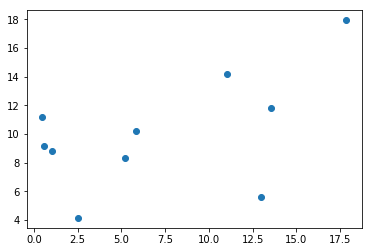

[2 5 9 4 6 1 3 0 7 8]
[8 0 2 3 7 9 6 5 1 4]
[2 5 9 4 6 1 0 3 7 8]
[2 5 9 4 6 1 0 3 7 8]
[2 5 9 1 4 6 0 3 7 8]


In [13]:
np.random.seed(3)
nhbr = Neighbourhood(10, 20)
nhbr.show()
parent1 = Individual(nhbr.num_cities, set_gene = True)
parent1.fitness = 100
parent2 = Individual(nhbr.num_cities, set_gene = True)
parent2.fitness = 50
print(parent1.gene)
print(parent2.gene)
ga = Genetic_Algorithm_TSP(nhbr)
child = ga.crossover(parent1, parent2)
print(child.gene)
ga.mutate(child)
print(child.gene)
ga.vaccinate1(child)
print(child.gene)

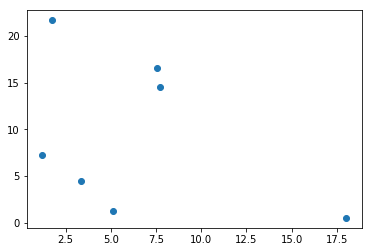

22
Genetic Algorithm solution:
[3 4 1 2 6 0 5]
82.02114544688217
Brute force solution:
[0 6 2 1 4 3 5]
82.02114544688217
Statistics:


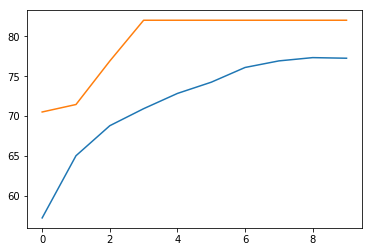

In [14]:
np.random.seed(21)
nhbr = Neighbourhood(7, 25)
nhbr.show()
ga = Genetic_Algorithm_TSP(nhbr)
print(ga.population_size)
solution, statistics = ga.solve()
print('Genetic Algorithm solution:')
print(solution.gene)
print(solution.fitness)
best_permutation, best_fitness = brute_force(nhbr)
print('Brute force solution:')
print(best_permutation)
print(best_fitness)
print('Statistics:')
plt.plot(range(ga.max_generations), statistics['mean_fitness'])
plt.plot(range(ga.max_generations), [individual.fitness for individual in statistics['fittest_individual']])
plt.show()

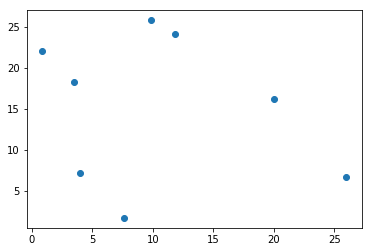

27
Genetic Algorithm solution:
[3 5 2 4 0 1 6 7]
85.17474144450932
Brute force solution:
[0 1 6 7 3 5 2 4]
85.17474144450932
Statistics:


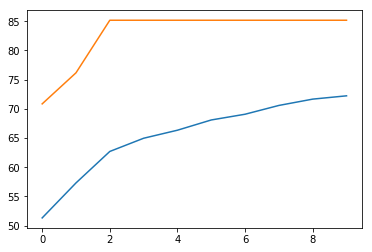

In [15]:
np.random.seed(43)
nhbr = Neighbourhood(8, 30)
nhbr.show()
ga = Genetic_Algorithm_TSP(nhbr)
print(ga.population_size)
solution, statistics = ga.solve()
print('Genetic Algorithm solution:')
print(solution.gene)
print(solution.fitness)
best_permutation, best_fitness = brute_force(nhbr)
print('Brute force solution:')
print(best_permutation)
print(best_fitness)
print('Statistics:')
plt.plot(range(ga.max_generations), statistics['mean_fitness'])
plt.plot(range(ga.max_generations), [individual.fitness for individual in statistics['fittest_individual']])
plt.show()

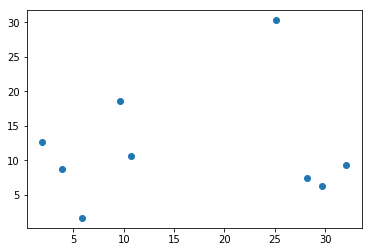

32
Genetic Algorithm solution:
[0 5 6 2 1 4 8 3 7]
82.91669422586659
Brute force solution:
[0 5 6 2 1 4 8 3 7]
82.91669422586659
Statistics:


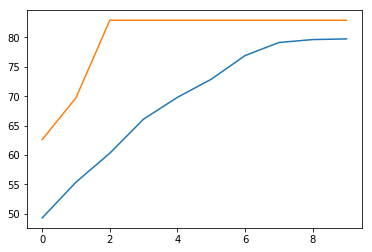

In [16]:
np.random.seed(15)
nhbr = Neighbourhood(9, 35)
nhbr.show()
ga = Genetic_Algorithm_TSP(nhbr)
print(ga.population_size)
solution, statistics = ga.solve()
print('Genetic Algorithm solution:')
print(solution.gene)
print(solution.fitness)
best_permutation, best_fitness = brute_force(nhbr)
print('Brute force solution:')
print(best_permutation)
print(best_fitness)
print('Statistics:')
plt.plot(range(ga.max_generations), statistics['mean_fitness'])
plt.plot(range(ga.max_generations), [individual.fitness for individual in statistics['fittest_individual']])
plt.show()

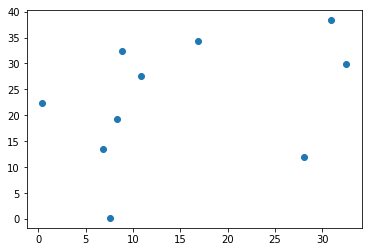

65
Genetic Algorithm solution:
[2 0 5 3 4 1 8 6 9 7]
81.88666461246451
Brute force solution:
[0 2 7 9 6 8 1 4 3 5]
81.88666461246453
Statistics:


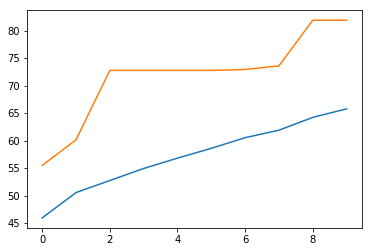

In [15]:
np.random.seed(22)
nhbr = Neighbourhood(10, 40)
nhbr.show()
ga = Genetic_Algorithm_TSP(nhbr, confidence = 0.999999, p_mutate = 0.42)
print(ga.population_size)
solution, statistics = ga.solve()
print('Genetic Algorithm solution:')
print(solution.gene)
print(solution.fitness)
best_permutation, best_fitness = brute_force(nhbr)
print('Brute force solution:')
print(best_permutation)
print(best_fitness)
print('Statistics:')
plt.plot(range(ga.max_generations), statistics['mean_fitness'])
plt.plot(range(ga.max_generations), [individual.fitness for individual in statistics['fittest_individual']])
plt.show()

### Experimenting

In [ ]:
arr = np.array([[np.random.rand()*30, np.random.rand()*30]  for i in range(30)])
print(arr.shape)
plt.scatter(arr[:, 0], arr[:, 1])
plt.show()
adj_dict = {(i, j): np.linalg.norm(arr[i]-arr[j]) for i in range(arr.shape[0]) for j in range(i+1, arr.shape[0])}
print(adj_dict)
print(arr.shape)
print(arr.T.shape)
arr2= np.matmul(arr.T, arr)
print(arr2.shape)
matrix = 1

In [ ]:
arr = np.array([[np.random.rand()*400, np.random.rand()*400]  for i in range(30)])
print(arr)
distances = []
for i in range(30):
    for j in range(30):
        ## For dictionary of pairs
        ## distances = {(i, j): np.linalg.norm(arr[i]-arr[j] for i in range(30) for j in range(i+1, 30)}
        if i != j:
             distances.append(np.linalg.norm(arr[i]-arr[j])) 
        else:
             distances.append(1000000)        
distances = np.array(distances).reshape((30, 30))
print(distances.shape)
print(distances[20])
print(np.min(distances[20]))
print(np.argmin(distances[20]))
print(distances[20][12])
print(distances)
print(np.argmin(distances))

In [ ]:
eqn_str = '1 / (1 + x**2 + y**2)'
#x = Symbol('x')
#y = Symbol('y')
#i,j,k = symbols('i, j, k')
#kernS(eqn_str)
function = sympify(eqn_str)
symbols = list(function.free_symbols)
print(symbols)
sym_val_dict = {k: np.random.rand() for k in symbols}
print(sym_val_dict)
deriv = function.diff(x)
eqn_str2 = 'x+y+x+2*y-i-j*k+1'
function2 = kernS(eqn_str2)
deriv2 = function2.diff(x)
print(deriv)
print(deriv2)
print(function+function2)
print(2*function2)
print(np.square(function2))
function.evalf(subs = {x: 0, y: 1})
f = lambdify((x, y), function)
print(f(1, 1))
##inequality = 'x <= 2'
##ineq_func = sympify(inequality)
##ineq_func.evalf(subs = {x: 1})
zero = sympify('0')
zero.evalf() + 1
absolute = sympify(-x)
absolute = abs(absolute)
print(absolute)
print(absolute.evalf(subs = {x: -2}))
max_func = sympify('max(x-2, 0)')
print(max_func.evalf(subs = {x: -3}))